# Titanic

Explorando o conjunto de dados do acidente do Titanic.

In [1]:
# Importando as Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Fazendo a leitura do Conjunto de Dados
titanic = pd.read_csv('train.csv') # Train = Treino

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# Pegando uma amostra dos dados que possuímos no CSV
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Dicionário de Dados

- **PassengerId**: Número de identificação do passageiro
- **Survived**: Informa se o passageiro sobreviveu ao desastre
    - 0 = Não
    - 1 = Sim
- **Pclass**: Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
- **Name**: Nome do passageiro
- **Sex**: Sexo do passageiro
- **Age**: Idade do passageiro
- **SibSp**: Quantidade de cônjuges e irmãos a bordo
- **Parch**: Quantidade de pais e filhos a bordo
- **Ticket**: Número da passagem
- **Fare**: Preço da Passagem
- **Cabin**: Número da cabine do passageiro
- **Embarked**: Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [ ]:
# Obtendo informações básicas do arquivo
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Mais uma forma de obter e saber se temos informações faltantes
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Verificando campos nulos, ou seja, com informações faltantes
titanic.isnull()

# False = informação existente
# True = informação faltante, ou nula.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Para saber o formato(SHAPE) do arquivo
# Temos duas formas
# Essa...
print(titanic.shape)

(891, 12)


In [ ]:
# E essa...
titanic.shape

(891, 12)

In [ ]:
# Outra forma de VERIFICAR SE temos informações faltantes
titanic.apply(lambda x: sum(x.isnull()), axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Analisando os Dados

In [ ]:
# Contando os sobreviventes
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
print('Não sobreviveram:', titanic['Survived'].value_counts()[0])
print('Sobreviveram:', titanic['Survived'].value_counts()[1])

Não sobreviveram: 549
Sobreviveram: 342


In [ ]:
# SibSp: Quantidade de cônjuges e irmãos a bordo
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
# Para saber de qual classe a pessoa fazia parte
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
print('Primeira Classe:', titanic['Pclass'].value_counts()[1])
print('Segunda Classe:', titanic['Pclass'].value_counts()[2])
print('Terceira Classe:', titanic['Pclass'].value_counts()[3])

Primeira Classe: 216
Segunda Classe: 184
Terceira Classe: 491


In [ ]:
# Parch: Quantidade de pais e filhos a bordo
titanic['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
# Saber aonde as pessoas embarcaram
# Em qual porto elas subiram no navio
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
print('Southampton:', titanic['Embarked'].value_counts()['S'])
print('Cherbourg:', titanic['Embarked'].value_counts()['C'])
print('Queenstown:', titanic['Embarked'].value_counts()['Q'])

Southampton: 644
Cherbourg: 168
Queenstown: 77


## Gerando Gráficos para ajudar na Análise

In [ ]:
sobreviventes = pd.crosstab(
    titanic['Survived'],
    titanic['Sex']
)

<AxesSubplot:xlabel='Survived'>

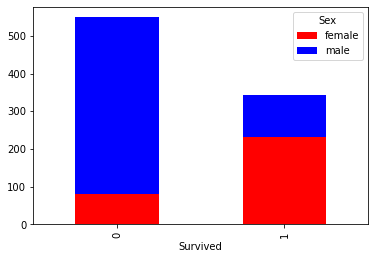

In [ ]:
sobreviventes.plot(
    kind='bar',
    stacked=True,
    color=['red','blue'],
)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

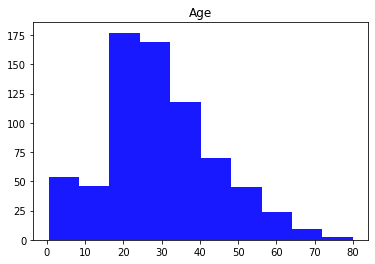

In [ ]:
figsize=(16,8)

titanic.hist(
    column='Age', 
    color=('blue'),
    alpha=0.9, 
    bins=10,
    grid=False
)

# Analisando Sobreviventes x Classe

Nesse momento estamos analisando os sobreviventes e não sobreviventes por classe social.

In [ ]:
sobreviventesClasse = pd.crosstab(
    titanic['Survived'],
    titanic['Pclass']
)

<AxesSubplot:xlabel='Survived'>

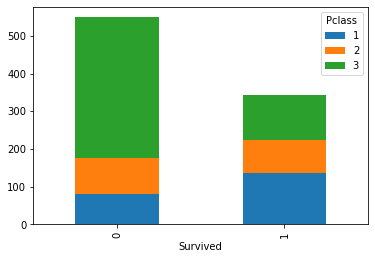

In [ ]:
sobreviventesClasse.plot(
    kind='bar',
    stacked=True,
)

## Sobreviveu/Faleceu por classe

Analisando a classe social das pessoas que sobreviveram e faleceram.

In [ ]:
sobreviventesSex = pd.crosstab(
    titanic['Sex'],
    titanic['Pclass']
)

<AxesSubplot:xlabel='Sex'>

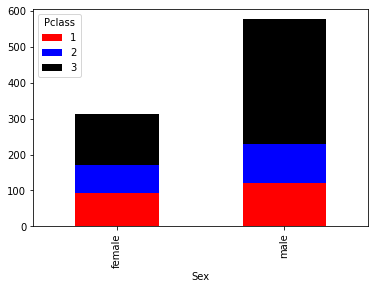

In [ ]:
sobreviventesSex.plot(
    kind='bar',
    stacked=True,
    color = ['red', 'blue', 'black']
)

# Embarque vs Sexo

In [ ]:
embarqueSexo = pd.crosstab(
    titanic['Embarked'],
    titanic['Sex']
)

<AxesSubplot:xlabel='Embarked'>

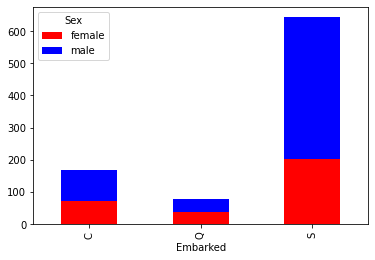

In [ ]:
embarqueSexo.plot(
    kind='bar',
    stacked=True,
    color = ['red', 'blue', 'black']
)